## Collatz self contained notebook

In [1]:
"""
This notebook analyses collatz sequences that lead to self contained numbers. Self contained
means in this context that an odd collatz number leads to an even collatz number that is 
a multiple of the odd number. The odd number 31 e.g. results for k= 3 in the even number 
310 which equals 10 * 31.
"""

# Fix possible import problems
import sys
sys.path.append("..")

# Imports
from math import log2
from matplotlib import pyplot as plt
import random as rnd
import pandas as pd
from collatz import generator as gen
from collatz import commons as com

# Configuration
MAX_VALUE = 1001
K_FACTOR = 3
MAX_ITERATIONS = 300
ODDS_ONLY = True
PRINT_TABLE = True

START_VALUE = rnd.randint(1, MAX_VALUE)

if START_VALUE % 2 == 0:
    START_VALUE = START_VALUE + 1

# START_VALUE = 31

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Generate Collatz sequence
analysis_frame = gen.generate_odd_collatz_sequence(
    start_value=START_VALUE, k=K_FACTOR, max_iterations=MAX_ITERATIONS)

# Drop last row
analysis_frame = analysis_frame[:-1]

# Derive new fields
analysis_frame["n"] = analysis_frame.index + 1

analysis_frame["beta_i"] = 1 + 1 / (K_FACTOR * analysis_frame["collatz"])
analysis_frame["beta"] = analysis_frame["beta_i"].cumprod()

analysis_frame["sigma_i"] = K_FACTOR + (1 / analysis_frame["collatz"])
analysis_frame["sigma"] = analysis_frame["sigma_i"].cumprod()
analysis_frame["sigma"] = analysis_frame["sigma"]
analysis_frame["sigma_natural"] = analysis_frame["sigma"] % 1 == 0

analysis_frame["alpha_i"] = analysis_frame["next_collatz"].apply(com.trailing_zeros)
analysis_frame["alpha_i"] = analysis_frame["alpha_i"].astype('int64')
analysis_frame["alpha_cycle"] = (log2(K_FACTOR) * analysis_frame["n"]).astype('int64') + 1
analysis_frame["alpha_max"] = \
    log2(START_VALUE) + (analysis_frame["n"] * log2(K_FACTOR))
analysis_frame["alpha_max"] = analysis_frame["alpha_max"].astype('int64') + 1
analysis_frame["alpha"] = analysis_frame["alpha_i"].cumsum()

analysis_frame["v_1"] = START_VALUE
analysis_frame["n"] = analysis_frame.index + 1

analysis_frame["multiple"] = analysis_frame["next_odd"] / analysis_frame["v_1"]
analysis_frame["self_contained"] = (analysis_frame["multiple"] % 1 == 0) &  \
                                   (analysis_frame["multiple"] > 1) 

# Print results
is_self_contained = analysis_frame["self_contained"].sum() >= 1
is_sigma_natural = (analysis_frame["sigma_natural"]).sum() >= 1

print_frame = analysis_frame[[
    "n", "v_1", "collatz", "next_odd", "multiple",  
    "self_contained", "beta_i", "beta", 
    "alpha", "sigma", "sigma_natural"]]

print_frame.columns = [
    "n","v_1", "v_i", "v_i+", "m", "sc", "b_i", "b", 
    "a", "s", "s_natural"]

print("Start value:", START_VALUE, 
      " K:", K_FACTOR, 
      " Self contained:", is_self_contained,
      " Sigma natural:", is_sigma_natural,
      "\n")

if PRINT_TABLE:
    print(print_frame.to_string(index=False), "\n")
    

Start value: 329  K: 3  Self contained: False  Sigma natural: False 

  n  v_1  v_i  v_i+     m     sc   b_i     b   a            s  s_natural
  1  329  329   247 0.751  False 1.001 1.001   2        3.003      False
  2  329  247   371 1.128  False 1.001 1.002   3        9.021      False
  3  329  371   557 1.693  False 1.001 1.003   4       27.088      False
  4  329  557   209 0.635  False 1.001 1.004   7       81.313      False
  5  329  209   157 0.477  False 1.002 1.005   9      244.328      False
  6  329  157    59 0.179  False 1.002 1.008  12      734.541      False
  7  329   59    89 0.271  False 1.006 1.013  13     2216.073      False
  8  329   89    67 0.204  False 1.004 1.017  15     6673.119      False
  9  329   67   101 0.307  False 1.005 1.022  16    20118.954      False
 10  329  101    19 0.058  False 1.003 1.026  20    60556.061      False
 11  329   19    29 0.088  False 1.018 1.044  21   184855.343      False
 12  329   29    11 0.033  False 1.011 1.056  24   560

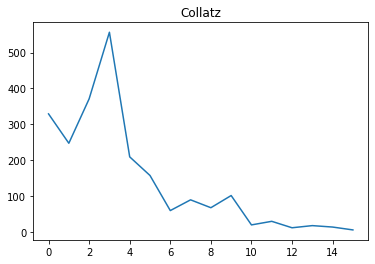

In [2]:
# Plot results
plt.figure()
plt.title("Collatz")
plt.plot(analysis_frame["collatz"], "-")
plt.show()